# Spectractor Simulation

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : April 05th 2018
- update : April 28th 2018


# Spectractor Launcher

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [2]:
import matplotlib.pyplot as plt
import sys
import os
import glob
import pandas as pd

In [3]:
from astropy.io import fits

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

Spectractor is supposed to be installed in paralel to Spectractorsim

In [7]:
PATH_SPECTRACTOR='../../Spectractor'
PATH_SPECTRACTORSIM='..'
PATH_GMAOMERRA='../merra2'

In [8]:
sys.path.append(PATH_SPECTRACTOR)
sys.path.append(PATH_SPECTRACTORSIM)
sys.path.append(PATH_GMAOMERRA)

## Spectractor 

In [9]:
from spectractor import *

## SpectractorSim

from spectractorsim import *

In [10]:
from spectractorsim import *

## Import Merra2

In [11]:
import libMerra2 as m2

# Configuration

## Spectra Input Directory

In [12]:
home=os.getenv('HOME')

In [13]:
path_data=os.path.join(home,'DATA/CTIODataJune2017_reduced_RG715_v2_prod1')

In [14]:
All_Subdirs=['data_28may17','data_29may17','data_30may17','data_31may17','data_01jun17','data_02jun17',
            'data_03jun17','data_04jun17','data_06jun17','data_08jun17','data_09jun17','data_10jun17',
            'data_12jun17','data_13jun17']

In [15]:
Flag_Photometric_Nights=[False,False,True,False,False,False,False,False,False,True,False,True,True,False]

### Select one directory to produce the data

In [16]:
idx_sel_subdir=2

In [17]:
path_data

'/Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2_prod1'

In [18]:
path_spectra=os.path.join(path_data,All_Subdirs[idx_sel_subdir])

In [19]:
path_spectra

'/Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2_prod1/data_30may17'

In [20]:
search_string=os.path.join(path_spectra,'*.fits')
all_spectrafiles=glob.glob(search_string)

In [21]:
all_spectrafiles=sorted(all_spectrafiles)

## Simulation mode

Defines three typical atmospheric conditions:
- *clearsky* : no aerosols, no PWV, ozone =300 DU
- *standard* : aer=0.05, pwv=4mm, ozone =300 DU 
- *merra2*   : parameters taken from merra2

In [22]:
Sim_Modes=['clearsky','standard','merra2' ]

## Output directory

defines the different output directories corresponding to each simulation mode

In [23]:
topoutputdir=os.path.join("./CTIODataJune2017_reduced_RG715_v2_prod1_SimSpectra",All_Subdirs[idx_sel_subdir])
all_outputdirs=[]
for simmode in Sim_Modes:
    outputdir=os.path.join(topoutputdir,simmode)
    all_outputdirs.append(outputdir)
    ensure_dir(outputdir)

In [24]:
print all_outputdirs

['./CTIODataJune2017_reduced_RG715_v2_prod1_SimSpectra/data_30may17/clearsky', './CTIODataJune2017_reduced_RG715_v2_prod1_SimSpectra/data_30may17/standard', './CTIODataJune2017_reduced_RG715_v2_prod1_SimSpectra/data_30may17/merra2']


## Logbook

For the moment, the logbook is in the local directory

In [25]:
file_logbook_csv=os.path.join(PATH_SPECTRACTOR,'ctiofulllogbook_jun2017_v4.csv')

In [26]:
df_ctio_lbk=pd.read_csv(file_logbook_csv,sep=';')

In [27]:
df_ctio_lbk.columns

Index([u'Unnamed: 0', u'date', u'subdir', u'index', u'object', u'filter',
       u'disperser', u'airmass', u'exposure', u'focus', u'seeing', u'P', u'T',
       u'RH', u'W', u'file', u'Obj-posXpix', u'Obj-posYpix', u'Dx', u'Dy',
       u'comment', u'skip'],
      dtype='object')

In [28]:
df_ctio_lbk=df_ctio_lbk.reindex(columns=['date','P','T','RH','airmass','seeing','exposure','object','filter','disperser','focus','W','subdir','file']).set_index('date').sort_index()

In [29]:
df_ctio_lbk.head()

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,subdir,file
date,,,,,,,,,,,,,
2017-05-28T01:36:40.705,779,"5,6",60,"1,009","1,443",5,pointing,dia,Thor300,0,"8,9",data_26may17,reduc_20170526_001.fits
2017-05-28T01:41:52.197,780,"5,6",60,"1,007","1,39",5,pointing,dia,Ron400,0,"10,8",data_26may17,reduc_20170526_002.fits
2017-05-28T01:46:06.150,779,"5,9",59,"1,057","1,255",5,pointing,dia,Ron400,0,"6,8",data_26may17,reduc_20170526_003.fits
2017-05-28T01:50:31.257,779,"5,9",57,"1,057","1,409",5,pointing,dia,Ron400,0,"9,1",data_26may17,reduc_20170526_004.fits
2017-05-28T01:58:18.598,779,"5,9",0,"1,058","1,293",5,pointing,dia,Ron400,0,"14,7",data_26may17,reduc_20170526_005.fits


### Extract the relevant data and sort by the column index

In [30]:
all_obs=df_ctio_lbk.loc[(df_ctio_lbk["subdir"]==All_Subdirs[idx_sel_subdir])].sort_index()

In [31]:
all_obs.head()

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,subdir,file
date,,,,,,,,,,,,,
2017-05-30T21:17:00.652,782,"7,6",36,"1,181","1,724",0,bias,RG715,Ron400,12650,"5,6",data_30may17,reduc_20170630_001.fits
2017-05-30T21:17:44.185,782,"7,6",36,"1,181","1,724",0,bias,RG715,Ron400,12650,"5,6",data_30may17,reduc_20170630_002.fits
2017-05-30T21:18:27.708,782,"7,5",36,"1,181","1,724",0,bias,RG715,Ron400,12650,"4,9",data_30may17,reduc_20170630_003.fits
2017-05-30T21:19:11.234,782,"7,5",36,"1,181","1,724",0,bias,RG715,Ron400,12650,"4,7",data_30may17,reduc_20170630_004.fits
2017-05-30T21:19:54.772,782,"7,5",36,"1,181","1,724",0,bias,RG715,Ron400,12650,"4,7",data_30may17,reduc_20170630_005.fits


## MERRA2

In [32]:
file_merra2=os.path.join(PATH_GMAOMERRA,'MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_AllYear.csv')
df_merra2=pd.read_csv(file_merra2,index_col=0)
df_merra2.index.name='time'
# convert the string into timestamp
#-------------------------------------
all_datetime_merra2=pd.to_datetime(df_merra2.index.get_values())

In [33]:
df_merra2.head()

,ps,pwv,ozone,TOTEXTTAU,TOTANGSTR,TOTSCATAU,TAUTOT,TAUHGH,TAUMID,TAULOW
time,,,,,,,,,,
2017-04-30 00:00:00,78636.914062,2.822547,260.352051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 00:30:00,NaN,NaN,NaN,0.029347,1.307469,0.027696,0.0,0.0,0.0,0.0
2017-04-30 01:00:00,78649.085938,2.668410,261.006653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 01:30:00,NaN,NaN,NaN,0.028410,1.303434,0.026786,0.0,0.0,0.0,0.0
2017-04-30 02:00:00,78661.726562,2.609197,261.566254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## SpectractorSim config

### Setting the parameters of SpectractorSim

In [34]:
parameters.VERBOSE = False
parameters.DEBUG = False

In [ ]:
def get_image_filename(filename):
    """
    Retretrieve the image name from the spectrum filename
    """
    base_filename=os.path.basename(filename)
    dir_filename=os.path.dirname(filename)
    rootname,ext=base_filename.split('.')
    splitrootname=rootname.split('_')
    fn=splitrootname[0]+'_'+splitrootname[1]+'_'+splitrootname[2]+'.'+ext
    tag=splitrootname[1]+'_'+splitrootname[2]
    return fn,tag

# Simulation

- loop on the spectra filename
- extract the image filename
- identify the row in the logbook corresponding to the image filename
- extract the image time and pressure

============================ idx= 0  ===== file = reduc_20170530_057_spectrum.fits ===================
     P    T  aer                                            airmass  clouds  \
0  783  9,3  0.0  date
2017-05-31T00:00:26.147    1,053
Name: ai...     0.0   

     object  ozone  pwv  simumode                     time  
0  HD111980  300.0  0.0  clearsky  2017-05-31T00:00:26.147  


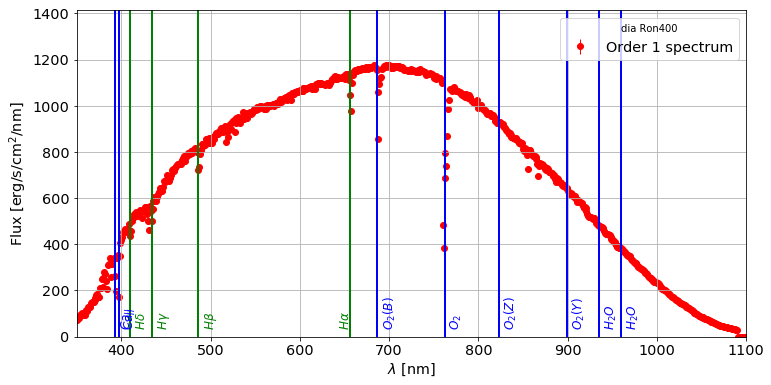

============================ idx= 0  ===== file = reduc_20170530_057_spectrum.fits ===================
     P    T   aer                                            airmass  clouds  \
0  783  9,3  0.05  date
2017-05-31T00:00:26.147    1,053
Name: ai...     0.0   

     object  ozone  pwv  simumode                     time  
0  HD111980  300.0  4.0  standard  2017-05-31T00:00:26.147  


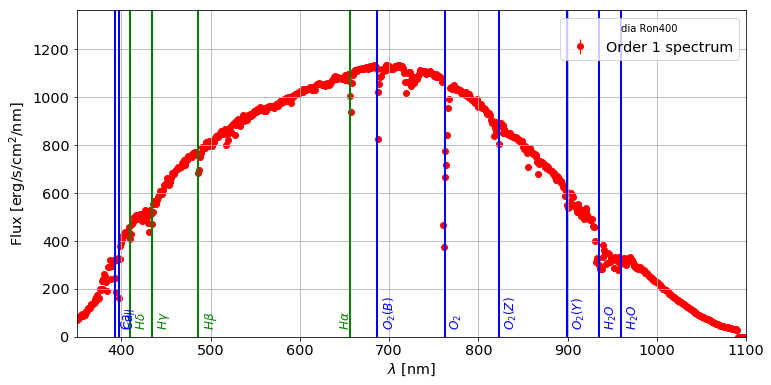

============================ idx= 0  ===== file = reduc_20170530_057_spectrum.fits ===================
     P    T  aer                                            airmass  clouds  \
0  783  9,3  0.0  date
2017-05-31T00:00:26.147    1,053
Name: ai...     0.0   

     object  ozone       pwv simumode                     time  
0  HD111980  300.0  4.134839   merra2  2017-05-31T00:00:26.147  


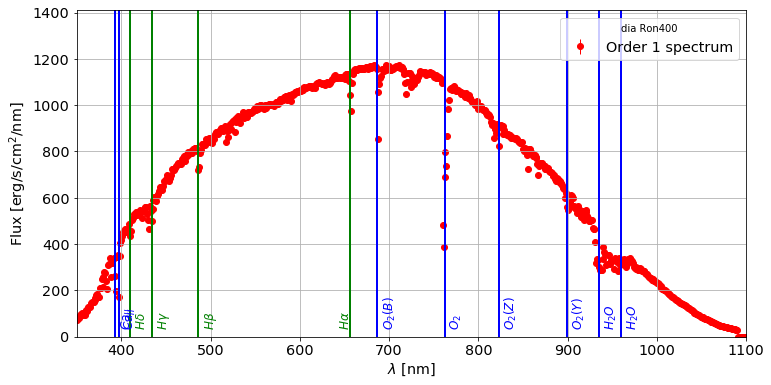

============================ idx= 10  ===== file = reduc_20170530_068_spectrum.fits ===================
     P    T  aer                                            airmass  clouds  \
0  783  8,6  0.0  date
2017-05-31T00:23:13.357    1,033
Name: ai...     0.0   

     object  ozone  pwv  simumode                     time  
0  HD111980  300.0  0.0  clearsky  2017-05-31T00:23:13.357  


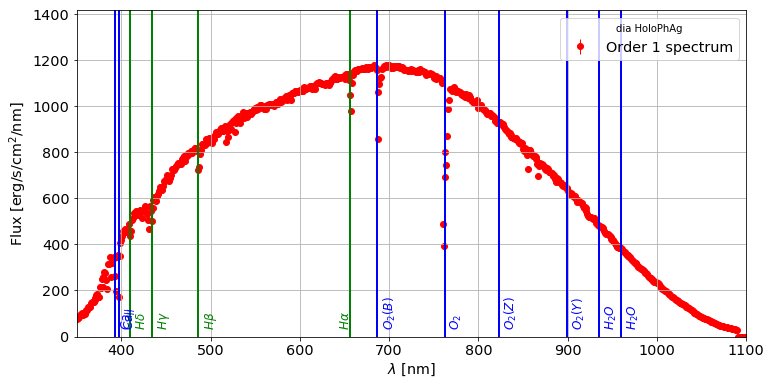

============================ idx= 10  ===== file = reduc_20170530_068_spectrum.fits ===================
     P    T   aer                                            airmass  clouds  \
0  783  8,6  0.05  date
2017-05-31T00:23:13.357    1,033
Name: ai...     0.0   

     object  ozone  pwv  simumode                     time  
0  HD111980  300.0  4.0  standard  2017-05-31T00:23:13.357  


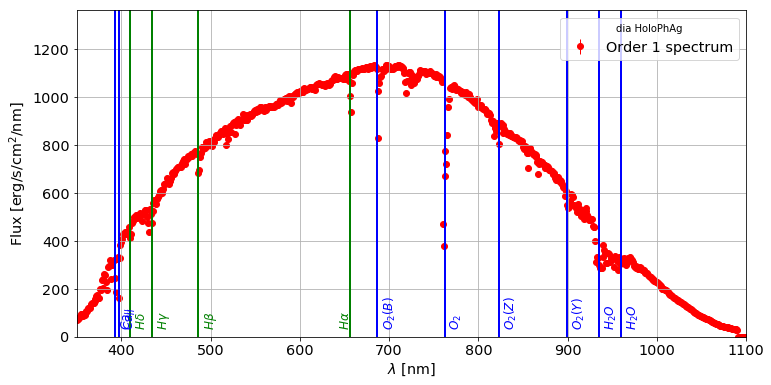

============================ idx= 10  ===== file = reduc_20170530_068_spectrum.fits ===================
     P    T  aer                                            airmass  clouds  \
0  783  8,6  0.0  date
2017-05-31T00:23:13.357    1,033
Name: ai...     0.0   

     object  ozone       pwv simumode                     time  
0  HD111980  300.0  4.134839   merra2  2017-05-31T00:23:13.357  


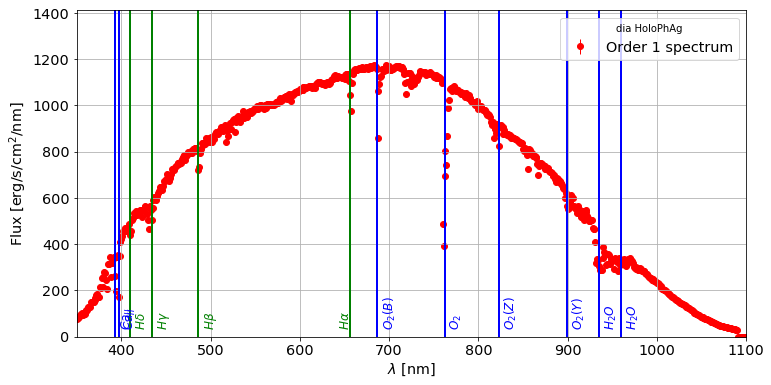

In [ ]:
for idx,theinputfilename in np.ndenumerate(all_spectrafiles):   
    image_fn,tagname=get_image_filename(theinputfilename)
    dts=all_obs[all_obs.file==image_fn]  # exctract the info from the logbook
    
    #extract info from the logbook
    thetime_ctio=dts.index.get_values()[0]
    theobject_ctio=dts["object"][0]
    thepressure_ctio=dts["P"][0]
    thetemperature_ctio=dts["T"][0]
    theairmass_ctio=dts['airmass']
    
    #extract the info from MERRA2
    timestamp0=pd.to_datetime(thetime_ctio)
    ps_m2,pwv_m2,ozone_m2,aer_m2,clouds_m2,deltat1_m2,deltat2_m2=m2.GetAtmosphericParameters(timestamp0,df_merra2)
    
    #decide which weather conditions should be sued
    if thepressure_ctio>700:
        thepressure_tosim=thepressure_ctio
        thetemperature_tosim=thetemperature_ctio
    
    else:
        # do not take the pressure of Merra2 which is over-estimated
        thepressure_tosim=782.5  # this value is hardcoded in SpectractorSim if thepressure_ctio is wrong, ie thepressure_ctio=-4
        thetemperature_tosim=10.0
        
    # initialisation of values to sim
    pwv_tosim=0.
    ozone_tosim=300.
    aer_tosim=0.
    clouds_tosim=clouds_m2 # on extinction is apllied, but only kept by memory
    
    # loop on pre-defined simulation  modes
    for idx2,simmode in np.ndenumerate(Sim_Modes):
        # defines output
        outputdir=all_outputdirs[idx2[0]]  # the directory where the result are to be written
        
        # defines simulation conditions
        if simmode=='clearsky':
            pwv_tosim=0.
            ozone_tosim=300.
            aer_tosim=0.
            
        elif simmode=='standard':
            pwv_tosim=4.0
            ozone_tosim=300.
            aer_tosim=0.05
          
        elif simmode=='merra2':
            pwv_tosim=pwv_m2
            ozone_tosim=300.
            aer_tosim=0.
        else:
            print 'unknown sim mode :',simmode
        
        # simulate the spectrum
        spectrum_simulation = SpectractorSim(theinputfilename,outputdir,lambdas=WL,pwv=pwv_tosim,ozone=ozone_tosim,aerosols=aer_tosim)
            
        #save simulation conditions in a logfile
        simu_log={'time': [thetime_ctio],'object':[theobject_ctio],'airmass': [theairmass_ctio],
                  'P':[thepressure_tosim],'T':[thetemperature_tosim],
                 'pwv':[pwv_tosim],'ozone':[ozone_tosim],'aer':[aer_tosim],'clouds':[clouds_tosim],'simumode':[simmode]}
        filename_log='log_simu'+'_'+tagname+'.csv'
        dts_log=pd.DataFrame(data=simu_log)
        dts_log.to_csv(os.path.join(outputdir,filename_log))
        
        # pick some samples to check
        if idx[0]%10==0:
            print '============================ idx=',idx[0],' ===== file =',os.path.basename(theinputfilename),'==================='
            print dts_log
            spectrum_simulation.plot_spectrum(nofit=True)